<a href="https://colab.research.google.com/github/mokoron/EDA/blob/master/BFG_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/drive/')

Mounted at /drive/


In [ ]:
ls '/drive/My Drive/BFG'

 BFG_EDA.ipynb
 BFG-Reference-2020.06.25-07.31.12.xlsx
 departments.csv
 entity_batch_amount.csv
 entity_route.csv
 equipment.csv
 NZP-BFG-2020.06.25-07.29.43.xlsx
 NZP.csv
 operation_group.csv
 plan_new.csv
 plan_new.xlsx
 prof.csv
 specification.csv
 technology.csv
 tech-res.csv
 Untitled
'Копия BFG - Оптимизация производства на GPU.gdoc'
'описание данных.pdf'


In [ ]:
!wget  -O "Roboto.zip" "https://fonts.google.com/download?family=Roboto"

--2020-10-16 17:12:35--  https://fonts.google.com/download?family=Roboto
Resolving fonts.google.com (fonts.google.com)... 74.125.134.102, 74.125.134.138, 74.125.134.100, ...
Connecting to fonts.google.com (fonts.google.com)|74.125.134.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘Roboto.zip’

Roboto.zip              [ <=>                ]   1.07M  --.-KB/s    in 0.06s   

2020-10-16 17:12:35 (18.2 MB/s) - ‘Roboto.zip’ saved [1124235]



In [ ]:
%%capture
!unzip "Roboto.zip"

In [ ]:
%%capture
!mv Roboto-Light.ttf  /usr/share/fonts/truetype/

In [ ]:
%%capture
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/Roboto-Light.ttf'
fontprop = fm.FontProperties(fname=path, size= 12)
fontprop_title = fm.FontProperties(fname=path, size= 32)
fontprop_axis = fm.FontProperties(fname=path, size= 20)

In [ ]:
import pandas as pd

from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
colorscale = [[0, '#7BC100'],[0.5, '#d8f5a9'],[1, '#ffffff']]

import plotly.graph_objects as go
from plotly.colors import n_colors
import numpy as np
from plotly.subplots import make_subplots
import re

In [ ]:
from collections import Counter
from plotly.offline import init_notebook_mode, iplot

In [ ]:
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import io
import plotly.express as px
from statistics import mean
%matplotlib inline

# EDA for BFG data

In [ ]:
!cd '/drive/My Drive/BFG'

## 1. Production plan 

In [ ]:
info = pd.DataFrame({"info": [], "value": []})

In [ ]:
plan_df = pd.read_csv('/drive/My Drive/BFG/plan_new.csv')

In [ ]:
colors = n_colors('rgb(216, 245, 169)', 'rgb(255, 255, 255)', 2, colortype='rgb')
colors = np.array([colors[0] if i%2==0 else colors[1] for i in range(plan_df.shape[0])])

for i, row in enumerate(plan_df["DATE"]):
    p = re.compile(" 00:00:00")
    datetime = p.split(plan_df["DATE"][i])[0]
    plan_df.iloc[i, 2] = datetime


fig = make_subplots(
    rows=1, cols=1,
    shared_xaxes=True,
    vertical_spacing=0,
    specs=[[{"type": "table"}]]
)

fig.add_trace(
    go.Table(
        columnwidth = [130,50,100,150,200,200,300],
        header=dict(
            values=list(plan_df.columns),
            line_color='rgb(123, 193, 0)', fill_color='rgb(123, 193, 0)',
            font=dict(color='white', size=12),
            align="left"
        ),
        cells=dict(
            values=[plan_df[k].tolist() for k in plan_df.columns],
            line_color=[colors],
            fill_color=[colors],
            font=dict(color='black', size=10)

        ),
        
    ),
    row=1, col=1,

)

fig.update_layout(
    width=1500,
    height=500,
    showlegend=False,
    title_text="Production plan",
)

fig.show()


In [ ]:
plan_df

INITIAL_AMOUNT  ...                               #IDENTITY
0               6660  ...  43010000000000000193_НА-000213515_2098
1               6500  ...  43010000000000000194_НА-000214681_2209
2              14920  ...  43010000000000000189_НА-000213512_2302
3              60404  ...  43010000000000000191_НА-000213518_2081
4               3250  ...  43010000000000000192_НА-000108291_2314
...              ...  ...                                     ...
1500               4  ...  43010000000000000230_НА-000169401_2353
1501               2  ...  43010000000000000203_НА-000192014_2197
1502               2  ...  43010000000000000268_НА-000244211_2200
1503               5  ...  43010000000000000203_НА-000192014_2197
1504               2  ...  43010000000000000221_НА-000148303_2022

[1505 rows x 7 columns]

### Some information about the columns values and types

In [ ]:
plan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   INITIAL_AMOUNT  1505 non-null   int64 
 1   AMOUNT          1505 non-null   int64 
 2   DATE            1505 non-null   object
 3   ORDER           1505 non-null   object
 4   CODE            1505 non-null   object
 5   NAME            1505 non-null   object
 6   #IDENTITY       1505 non-null   object
dtypes: int64(2), object(5)
memory usage: 82.4+ KB


### Number of null values in the dataset

In [ ]:
plan_df.isnull().sum()

INITIAL_AMOUNT    0
AMOUNT            0
DATE              0
ORDER             0
CODE              0
NAME              0
#IDENTITY         0
dtype: int64

### Orders

In [ ]:
orders = list(plan_df['ORDER'])
details = list(plan_df['CODE'])
details_amount = list(plan_df['AMOUNT'])

orders_dict = {}
for i in range(len(orders)):
    if orders[i] not in orders_dict:
        orders_dict[orders[i]] = {'suborders': {}, 'suborders_amount': 0}
    if details_amount[i] > 0:
        if details[i] not in orders_dict[orders[i]]['suborders']:
            orders_dict[orders[i]]['suborders'][details[i]] = 0
        orders_dict[orders[i]]['suborders'][details[i]] += details_amount[i]
    orders_dict[orders[i]]['suborders_amount'] = len(orders_dict[orders[i]]['suborders'])



#### Example of order detals

In [ ]:
orders_dict['NOT_STARTED_1']

{'suborders': {'Пружина 4110.20.031 / 40,40_б/о': 212,
  'Пружина 4110.20.032 / 12,40_б/о': 194,
  'Пружина 4110.30.051 / 77,00_б/о': 213,
  'Пружина 4110.30.052 / 23,00_б/о': 200,
  'Пружина 753.10.31.36.101 / 31,50_RAL 7015': 115,
  'Пружина 753.10.31.36.102 / 10,80_RAL 7015': 69,
  'Пружина 8ТС.281.282 / 105,72_RAL 7012': 126,
  'Пружина 8ТС.281.283-01 / 28,00_RAL 7012': 13,
  'Пружина 8ТС.281.284 / 97,84_RAL 7012': 1,
  'Пружина 8ТС.281.285 / 70,68_RAL 7012': 9,
  'Пружина 911.0.01.09.00.002 / 9,23_RAL 9005': 109,
  'Пружина ТЭМ3.35.30.101 / 36,20_RAL 7012': 286,
  'Пружина ЦДЛР.9855.00.00.001-55С2 / 7,30_5002': 1275,
  'Пружина ЦДЛР.9855.00.00.003-55С2 / 8,80_5002': 14928,
  'Пружина ЦДЛР.9855.00.00.004-55С2 / 3,00_RAL 5002': 624},
 'suborders_amount': 15}

In [ ]:
orders = list(plan_df['ORDER'])
orders_amount = len(set(orders))
print(f'amount of orders: {orders_amount}')
print(f'orders names: {set(orders)}')

amount of orders: 60
orders names: {'NOT_STARTED_1', '20-000032', '19-000092', '19-000010', '17-000041', '19-000095', '18-000111', '17-000031', '17-000010', '19-000107', '19-000083', '19-000109', '20-000003', '20-000040', '20-000016', '20-000019', '19-000111', '20-000015', '18-000003', '19-000073', '19-000030', '18-000162', '18-000073', '19-000102', '20-000023', '19-000086', '17-000027', '20-000043', '20-000020', '19-000069', '16-000050', '19-000044', '18-000070', '19-000094', '18-000050', '20-000014', '20-000017', '20-000042', '19-000114', '18-000066', '20-000013', '20-000028', '19-000081', '19-000093', '19-000038', '20-000009', '19-000055', '18-000169', '20-000008', '18-000077', '16-000051', '20-000033', '20-000022', '20-000034', '19-000099', '19-000075', '17-000099', '19-000082', '19-000110', '20-000001'}


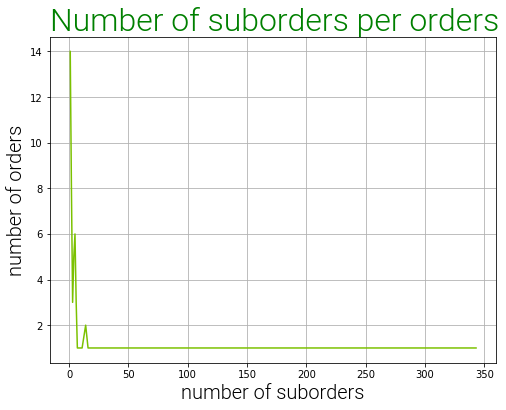

In [ ]:
order_number = plan_df['ORDER'].value_counts()
dial_stat = Counter(list(order_number))
plt.figure(figsize=(8,6))
plt.plot(*zip(*sorted(dial_stat.items())), color='#7BC100')
plt.grid(True)
plt.ylabel('number of orders',fontproperties=fontprop_axis)
plt.xlabel('number of suborders',fontproperties=fontprop_axis)
plt.title('Number of suborders per orders', loc='left',fontproperties=fontprop_title, color="green")
plt.show()

### Maximum, minimum, and mean values of suborders per orders

In [ ]:
men = round(np.mean(order_number), 0)
mx = np.max(order_number)
mn = np.min(order_number)
info.loc[5] = 'Mean number of suborders per orders', men
print(f'Mean number of suborders per orders: {men}')
info.loc[6] = 'Max number of suborders per orders', mx
print(f'Max number of suborders per orders: {mx}')
info.loc[7] = 'Min number of suborders per orders', mn
print(f'Min number of suborders per orders: {mn}')

Mean number of suborders per orders: 25.0
Max number of suborders per orders: 343
Min number of suborders per orders: 1


### Frequency of the details ordering

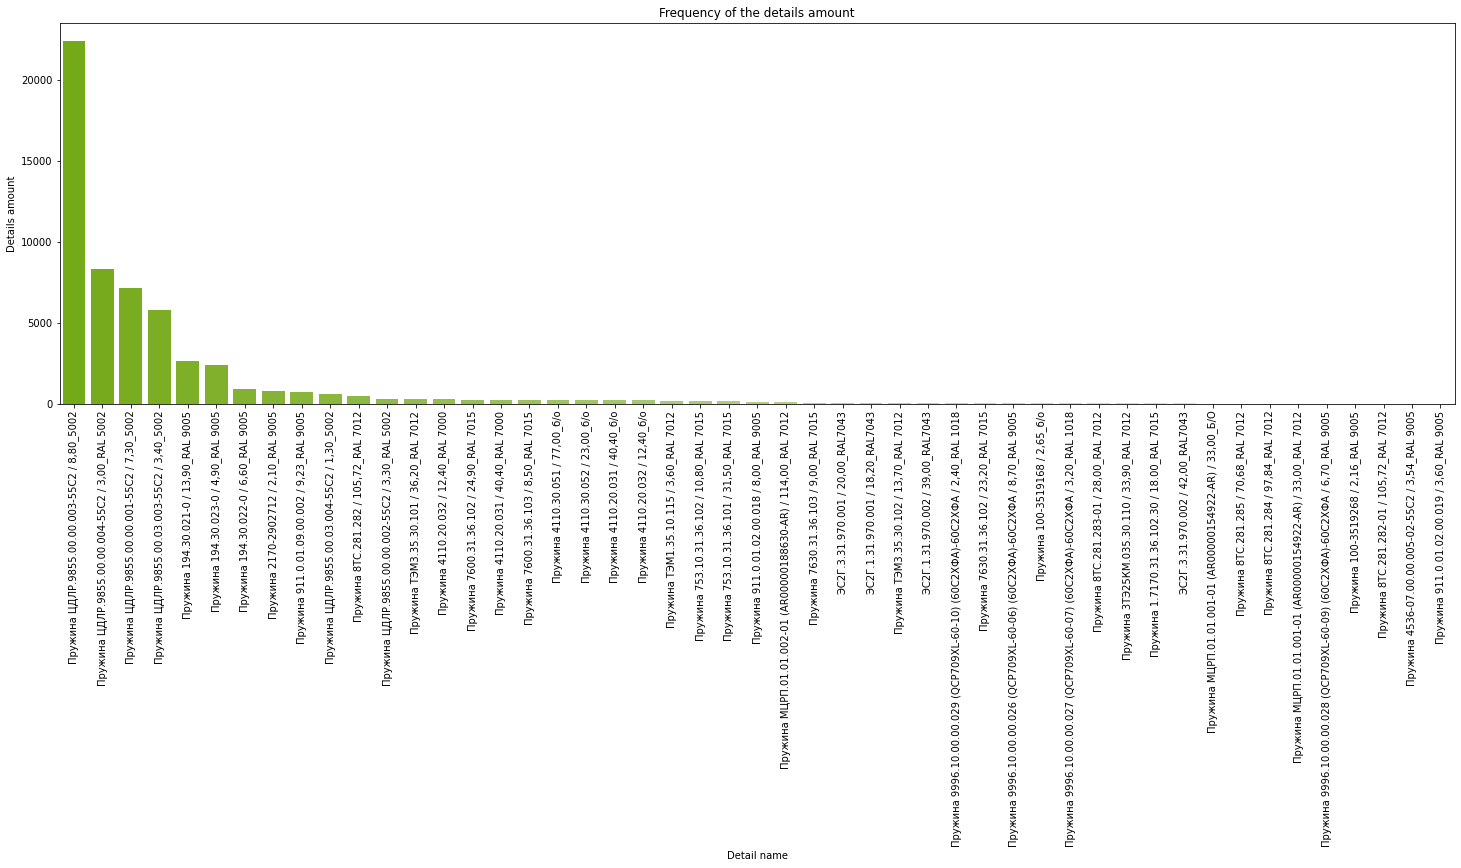

In [ ]:
details_number = plan_df.groupby(['CODE'])['AMOUNT'].agg('sum')
details_number_df = pd.DataFrame({'CODE': list(dict(details_number).keys()), 'AMOUNT': (dict(details_number).values())})
details_number_df = details_number_df.sort_values(by='AMOUNT', ascending=False)

f, ax = plt.subplots(figsize=(25, 7))
bp = sns.barplot(x = 'CODE', y='AMOUNT', data=details_number_df,
            palette=sns.light_palette("#7bc100", reverse=True, n_colors=len(set(list(details_number_df['CODE'])))))
plt.xlabel('Detail name')
plt.ylabel('Details amount')
plt.title('Frequency of the details amount')
bp = bp.set_xticklabels(labels = list(details_number_df['CODE']), rotation=90) 

In [ ]:
details_number_df_big = details_number_df[details_number_df['AMOUNT']>=300]
details_number_df_small = details_number_df[details_number_df['AMOUNT']<300]

#### Frequency of the details ordering (large)

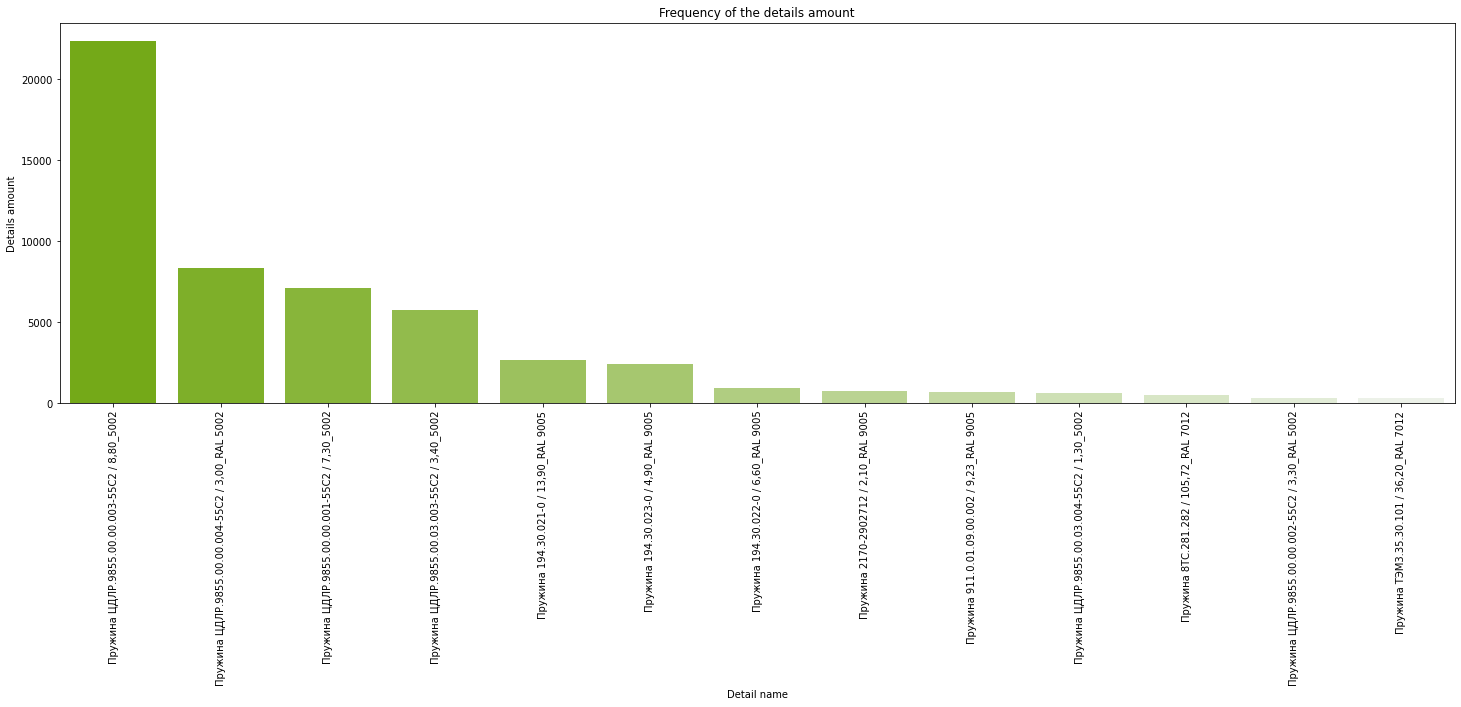

In [ ]:
f, ax = plt.subplots(figsize=(25, 7))
bp = sns.barplot(x = 'CODE', y='AMOUNT', data=details_number_df_big,
            palette=sns.light_palette("#7bc100", reverse=True, n_colors=len(set(list(details_number_df_big['CODE'])))))
plt.xlabel('Detail name')
plt.ylabel('Details amount')
plt.title('Frequency of the details amount')
bp = bp.set_xticklabels(labels = list(details_number_df_big['CODE']), rotation=90) 

#### Frequency of the details ordering (small)

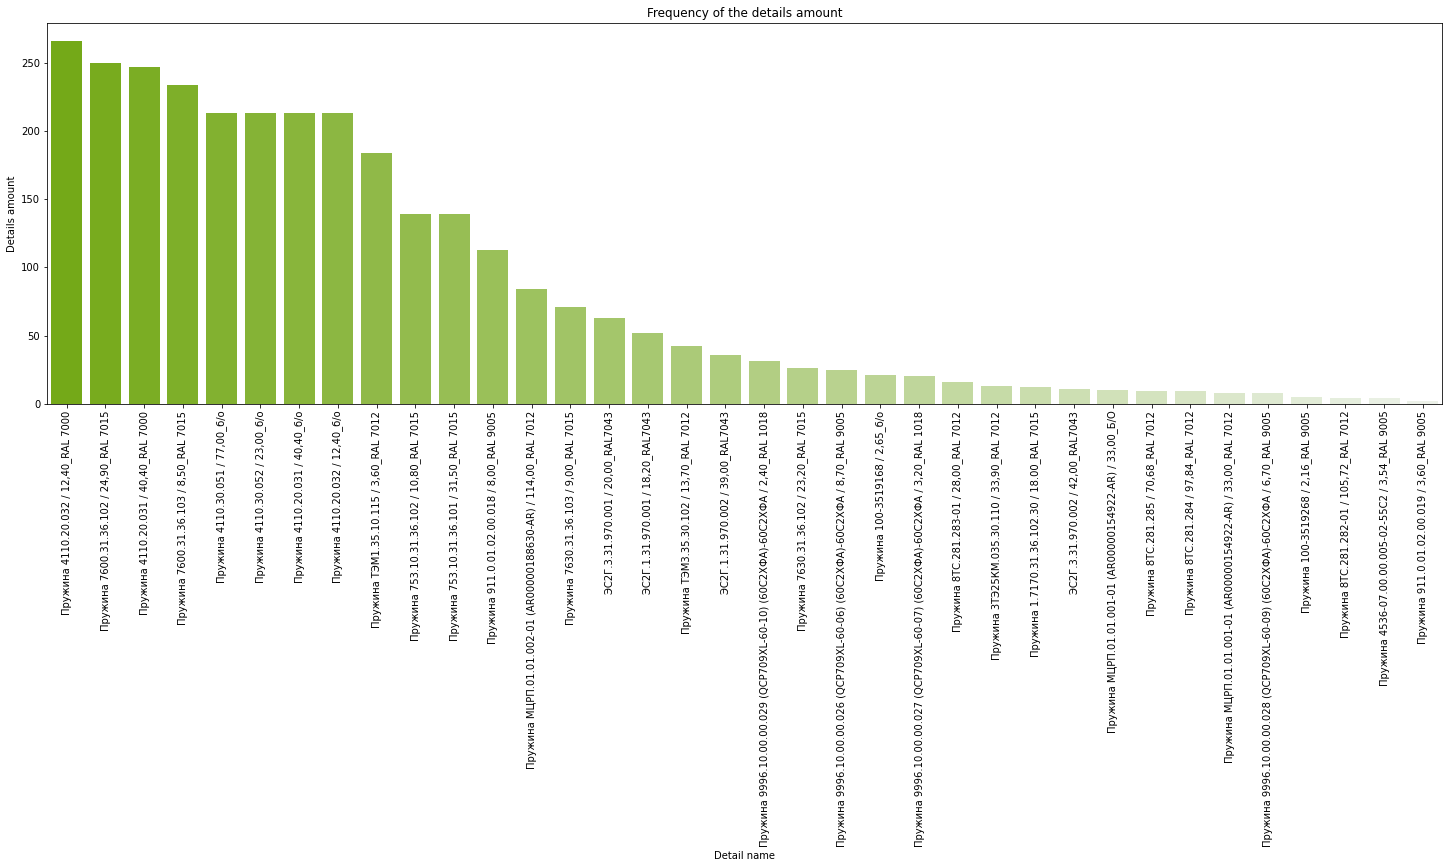

In [ ]:
f, ax = plt.subplots(figsize=(25, 7))
bp = sns.barplot(x = 'CODE', y='AMOUNT', data=details_number_df_small,
            palette=sns.light_palette("#7bc100", reverse=True, n_colors=len(set(list(details_number_df_small['CODE'])))))
plt.xlabel('Detail name')
plt.ylabel('Details amount')
plt.title('Frequency of the details amount')
bp = bp.set_xticklabels(labels = list(details_number_df_small['CODE']), rotation=90) 

## 2. Entity routes

In [ ]:
entity_routes_df = pd.read_csv('/drive/My Drive/BFG/entity_route.csv')

In [ ]:
entity_routes_df

ROUTE_ID  ... ALTERNATIVE
0     ДОР-2020.03/9901-410-001  ...           0
1    ДОР-2020.03/9901-5923-001  ...           1
2    ПРО-2019.07/0204-3111-001  ...           0
3    ДОР-2020.03/9901-3111-001  ...           1
4     ПРО-2019.02/0202-701-001  ...           1
..                         ...  ...         ...
568  ПРО-2020.05/0201-6102-001  ...           1
569  ПРО-2020.06/0209-6102-001  ...           1
570  ПРО-2020.06/0209-6301-001  ...           0
571  ПРО-2019.04/0206-4101-001  ...           0
572  ДОР-2019.04/9901-3901-001  ...           0

[573 rows x 3 columns]

## 3. Equipment

In [ ]:
equipment_df = pd.read_csv('/drive/My Drive/BFG/equipment.csv')


In [ ]:
colors = n_colors('rgb(216, 245, 169)', 'rgb(255, 255, 255)', 2, colortype='rgb')
colors = np.array([colors[0] if i%2==0 else colors[1] for i in range(equipment_df.shape[0])])


fig = make_subplots(
    rows=1, cols=1,
    shared_xaxes=True,
    vertical_spacing=0,
    specs=[[{"type": "table"}]]
)

fig.add_trace(
    go.Table(
        columnwidth = [130,50,100,150,200,200,300],
        header=dict(
            values=list(equipment_df.columns),
            line_color='rgb(123, 193, 0)', fill_color='rgb(123, 193, 0)',
            font=dict(color='white', size=12),
            align="left"
        ),
        cells=dict(
            values=[equipment_df[k].tolist() for k in equipment_df.columns],
            line_color=[colors],
            fill_color=[colors],
            font=dict(color='black', size=10)

        ),
        
    ),
    row=1, col=1,

)

fig.update_layout(
    width=1500,
    height=500,
    showlegend=False,
    title_text="Equipment",
)

fig.show()


### Amount of pieces of equipment in the departments

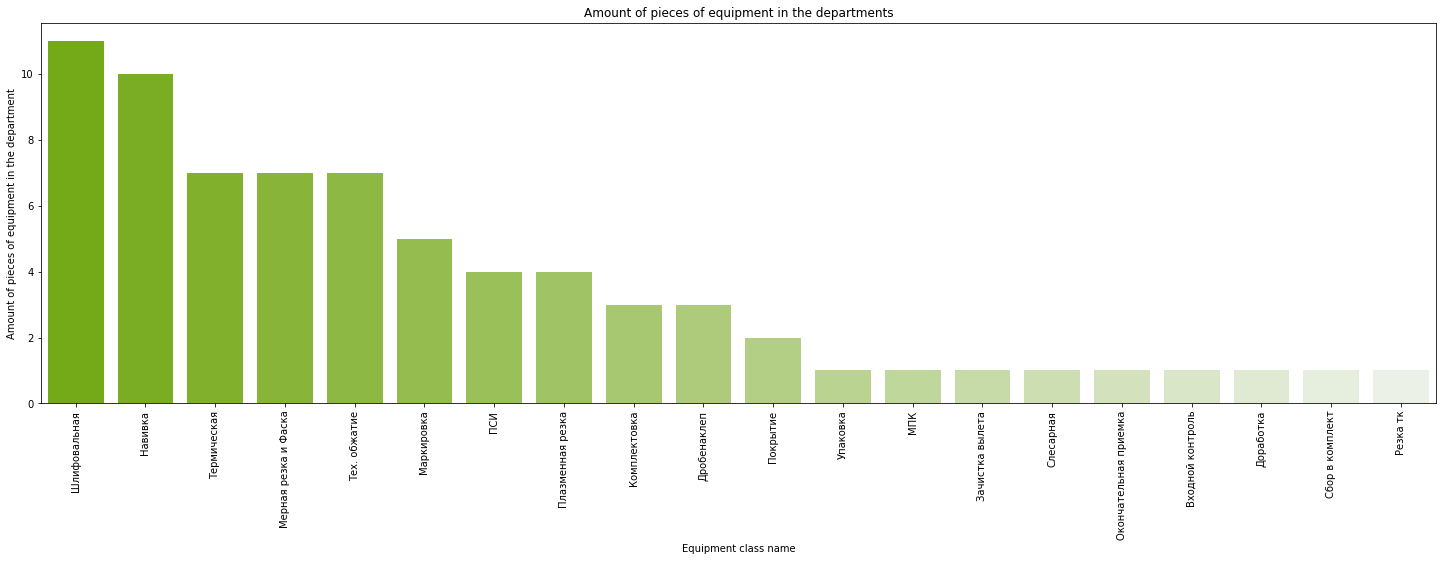

In [ ]:
equipment_number_dept = equipment_df['DEPT_ID'].value_counts()
equipment_number_dept_df = pd.DataFrame({'DEPT_ID': list(dict(equipment_number_dept).keys()), 'AMOUNT': (dict(equipment_number_dept).values())})
equipment_number_dept_df = equipment_number_dept_df.sort_values(by='AMOUNT', ascending=False)



f, ax = plt.subplots(figsize=(25, 7))
bp = sns.barplot(x = 'DEPT_ID', y='AMOUNT', data=equipment_number_dept_df,
            palette=sns.light_palette("#7bc100", reverse=True, n_colors=len(set(list(equipment_number_dept_df['DEPT_ID'])))))
plt.xlabel('Equipment class name')
plt.ylabel('Amount of pieces of equipment in the department')
plt.title('Amount of pieces of equipment in the departments')
bp = bp.set_xticklabels(labels = list(equipment_number_dept_df['DEPT_ID']), rotation=90)

### Amount of pieces of equipment in the classes

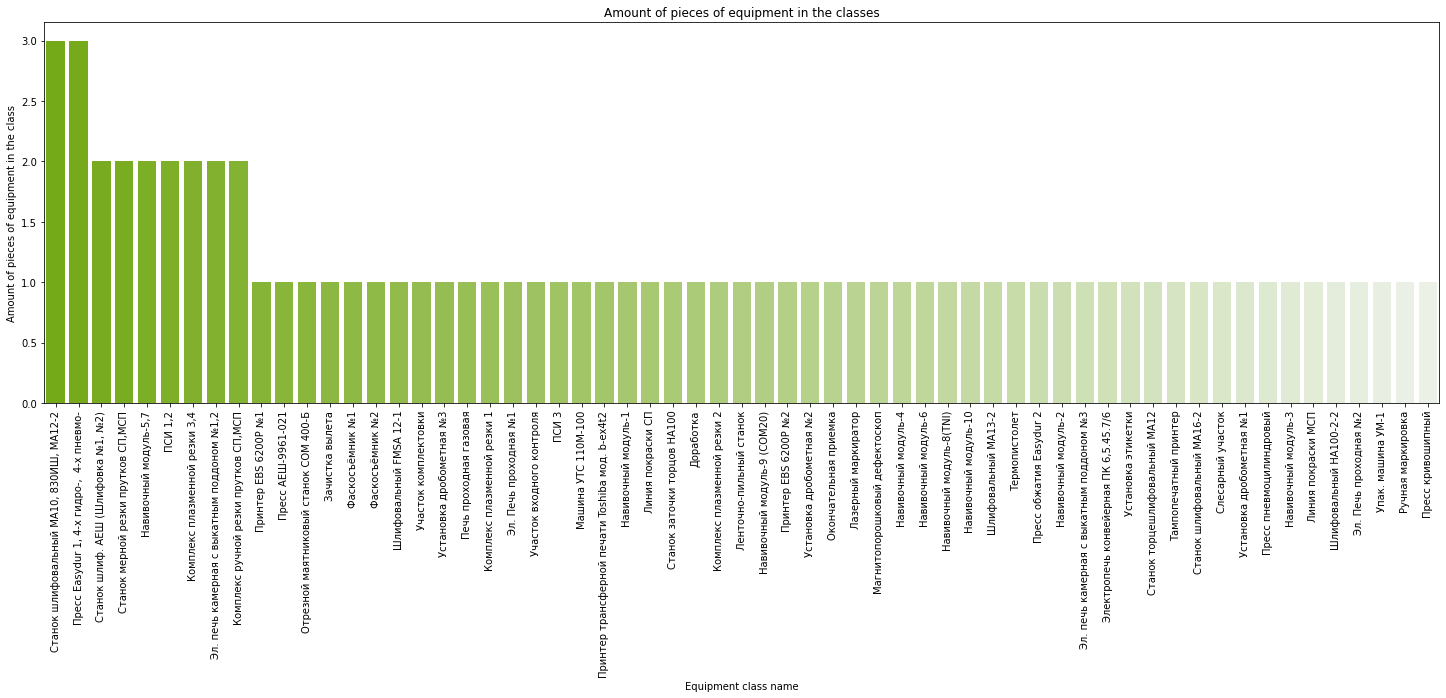

In [ ]:
equipment_number = equipment_df['EQUIPMENT_ID'].value_counts()
equipment_number_df = pd.DataFrame({'EQUIPMENT_ID': list(dict(equipment_number).keys()), 'AMOUNT': (dict(equipment_number).values())})
equipment_number_df = equipment_number_df.sort_values(by='AMOUNT', ascending=False)



f, ax = plt.subplots(figsize=(25, 7))
bp = sns.barplot(x = 'EQUIPMENT_ID', y='AMOUNT', data=equipment_number_df,
            palette=sns.light_palette("#7bc100", reverse=True, n_colors=len(set(list(equipment_number_df['EQUIPMENT_ID'])))))
plt.xlabel('Equipment class name')
plt.ylabel('Amount of pieces of equipment in the class')
plt.title('Amount of pieces of equipment in the classes')
bp = bp.set_xticklabels(labels = list(equipment_number_df['EQUIPMENT_ID']), rotation=90)

## 3. Production technology

In [ ]:
technology_nan_df = pd.read_csv('/drive/My Drive/BFG/technology.csv')
del technology_nan_df['Unnamed: 1']
del technology_nan_df['Unnamed: 4']
del technology_nan_df['Unnamed: 7']
del technology_nan_df['Unnamed: 10']
del technology_nan_df['Unnamed: 11']
del technology_nan_df['Unnamed: 12']

technology_nan_df['OPERATION_ID'] = technology_nan_df['ID']
del technology_nan_df['ID']

technology_nan_df['CODE'] = technology_nan_df['_ItemName']
del technology_nan_df['_ItemName']

In [ ]:
technology_df = pd.read_csv('/drive/My Drive/BFG/technology.csv').fillna(0)
del technology_df['Unnamed: 1']
del technology_df['Unnamed: 4']
del technology_df['Unnamed: 7']
del technology_df['Unnamed: 10']
del technology_df['Unnamed: 11']
del technology_df['Unnamed: 12']

technology_df['OPERATION_ID'] = technology_df['ID']
del technology_df['ID']

technology_df['CODE'] = technology_df['_ItemName']
del technology_df['_ItemName']

In [ ]:
colors = n_colors('rgb(216, 245, 169)', 'rgb(255, 255, 255)', 2, colortype='rgb')
colors = np.array([colors[0] if i%2==0 else colors[1] for i in range(technology_nan_df.shape[0])])


fig = make_subplots(
    rows=1, cols=1,
    shared_xaxes=True,
    vertical_spacing=0,
    specs=[[{"type": "table"}]]
)

fig.add_trace(
    go.Table(
        columnwidth = [200,300,100,150,50,150,200, 80, 80, 80],
        header=dict(
            values=list(technology_nan_df.columns),
            line_color='rgb(123, 193, 0)', fill_color='rgb(123, 193, 0)',
            font=dict(color='white', size=17),
            align="left"
        ),
        cells=dict(
            values=[technology_nan_df[k].tolist() for k in technology_nan_df.columns],
            line_color=[colors],
            fill_color=[colors],
            font=dict(color='black', size=15)

        ),
        
    ),
    row=1, col=1,

)

fig.update_layout(
    width=1500,
    height=700,
    showlegend=False,
    title_text="Production technology",
)

fig.show()


In [ ]:
technology_nan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4849 entries, 0 to 4848
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ROUTE_ID      4849 non-null   object 
 1   _ItemName     4849 non-null   object 
 2   ID            4849 non-null   object 
 3   NAME          4849 non-null   object 
 4   NOP           4849 non-null   int64  
 5   DEPT_ID       4849 non-null   object 
 6   EQUIPMENT_ID  4849 non-null   object 
 7   T_NAL         770 non-null    float64
 8   T_PZ          9 non-null      float64
 9   T_SHT         4341 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 379.0+ KB


In [ ]:
technology_nan_df.isnull().sum()

ROUTE_ID           0
_ItemName          0
ID                 0
NAME               0
NOP                0
DEPT_ID            0
EQUIPMENT_ID       0
T_NAL           4079
T_PZ            4840
T_SHT            508
dtype: int64

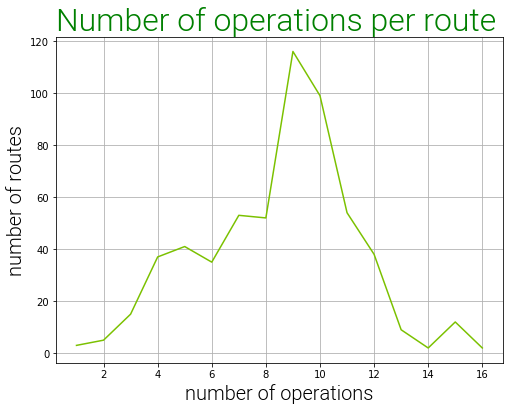

In [ ]:
route_number = technology_df['ROUTE_ID'].value_counts()
dial_stat = Counter(list(route_number))
plt.figure(figsize=(8,6))
plt.plot(*zip(*sorted(dial_stat.items())), color='#7BC100')
plt.grid(True)
plt.ylabel('number of routes',fontproperties=fontprop_axis)
plt.xlabel('number of operations',fontproperties=fontprop_axis)
plt.title('Number of operations per route', loc='left',fontproperties=fontprop_title, color="green")
plt.show()

### Frequency of the equipment using

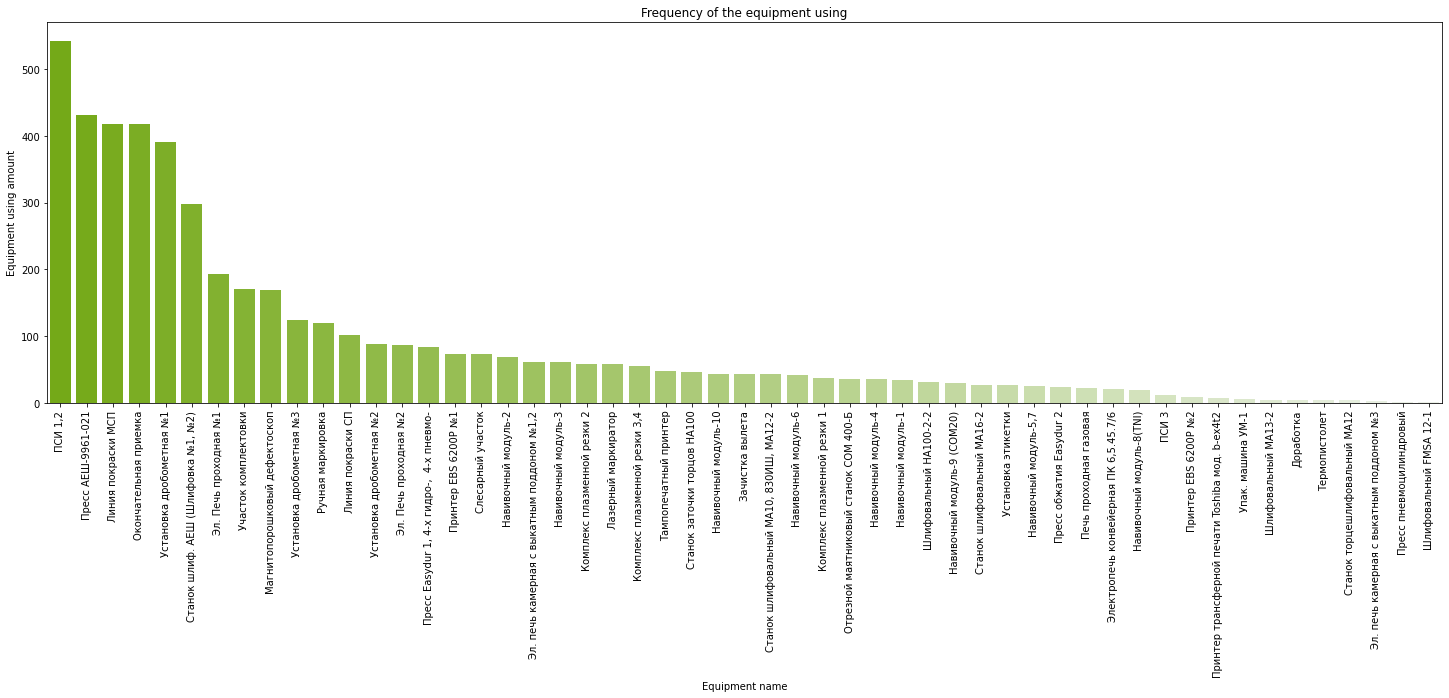

In [ ]:
equipment_number = technology_df['EQUIPMENT_ID'].value_counts()
equipment_number_df = pd.DataFrame(equipment_number)
equipment_number_df['AMOUNT'] = list(equipment_number_df['EQUIPMENT_ID'])
equipment_number_df['EQUIPMENT_ID'] = list(equipment_number_df.index)
equipment_number_df = equipment_number_df.sort_values(by='AMOUNT', ascending=False)

f, ax = plt.subplots(figsize=(25, 7))
bp = sns.barplot(x = 'EQUIPMENT_ID', y='AMOUNT', data=equipment_number_df,
            palette=sns.light_palette("#7bc100", reverse=True, n_colors=len(set(list(equipment_number_df['EQUIPMENT_ID'])))))
plt.xlabel('Equipment name')
plt.ylabel('Equipment using amount')
plt.title('Frequency of the equipment using')
bp = bp.set_xticklabels(labels = list(equipment_number_df['EQUIPMENT_ID']), rotation=90) 


### Maximum, minimum, and mean values of time of the production of one detail of each type

In [ ]:
technology_t_sht_df = technology_df[technology_df['T_SHT']>0]
men = round(np.mean(list(technology_t_sht_df['T_SHT'])), 0)
mx = np.max(list(technology_t_sht_df['T_SHT']))
mn = np.min(list(technology_t_sht_df['T_SHT']))
info.loc[5] = 'Mean number of suborders per orders', men
print(f'Mean number of suborders per orders: {men}')
info.loc[6] = 'Max number of suborders per orders', mx
print(f'Max number of suborders per orders: {mx}')
info.loc[7] = 'Min number of suborders per orders', mn
print(f'Min number of suborders per orders: {mn}')

Mean number of suborders per orders: 3.0
Max number of suborders per orders: 60.0
Min number of suborders per orders: 0.016666


### Summary time of the top-50 of the longest routes 

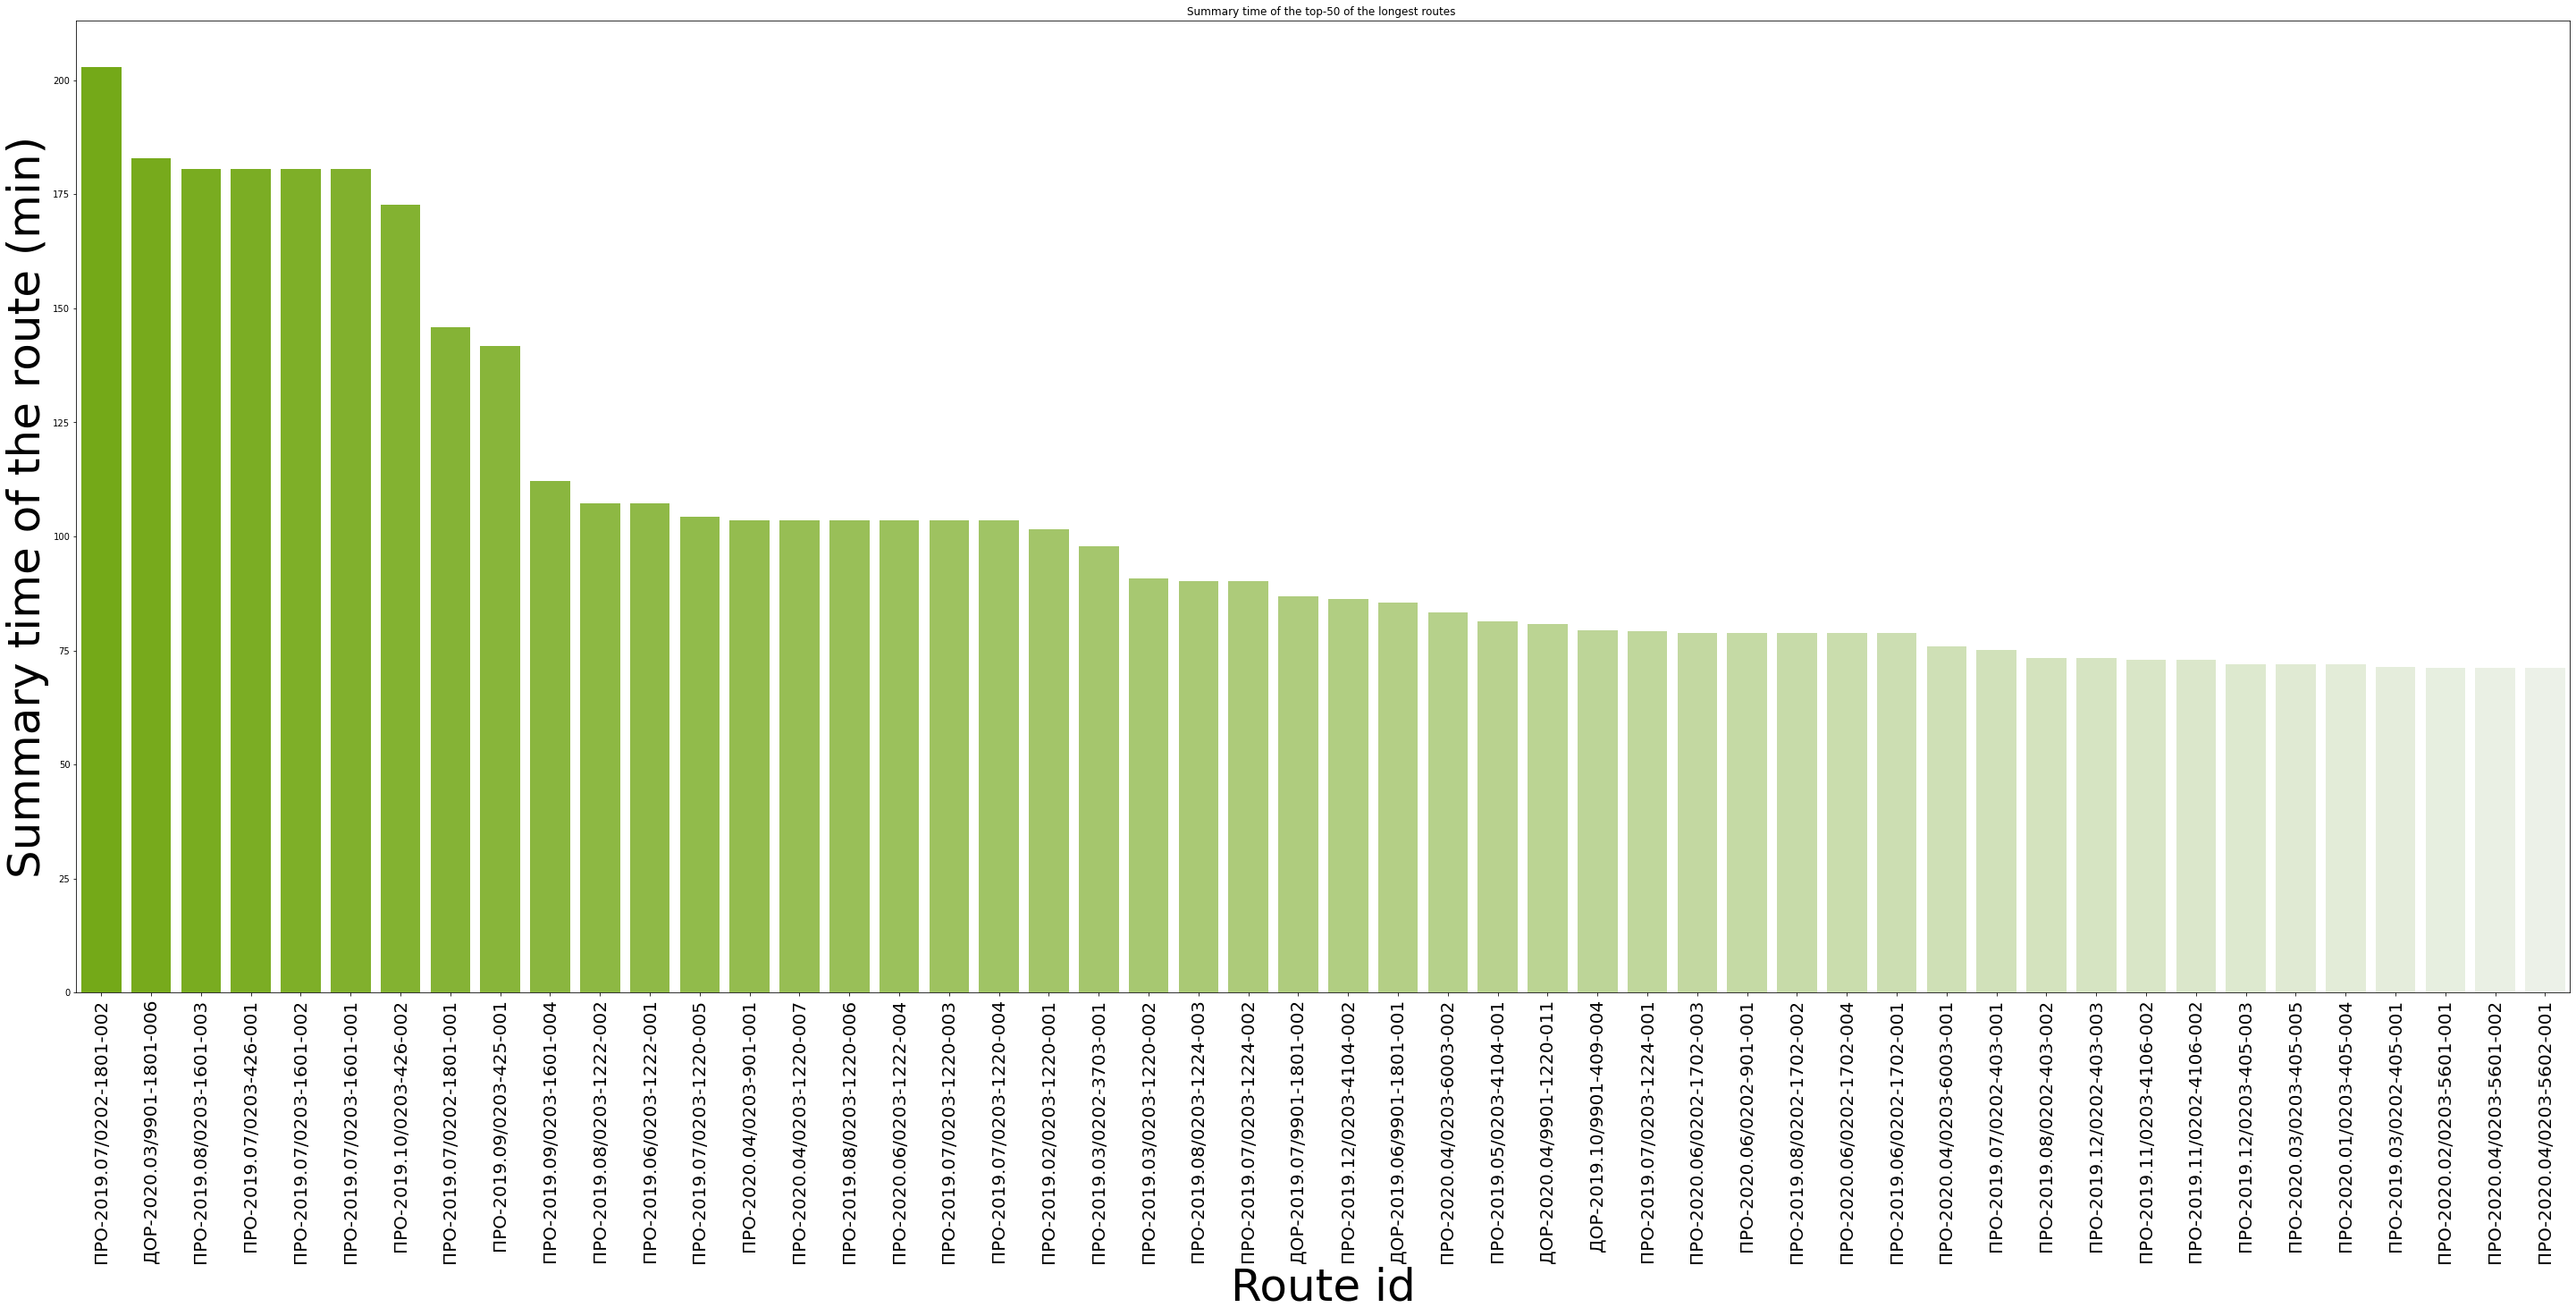

In [ ]:
route_time_df = technology_df.groupby(['ROUTE_ID'])['T_SHT'].agg('sum')
route_time_df = pd.DataFrame({'ROUTE_ID': list(dict(route_time_df).keys()), 'T_SHT': (dict(route_time_df).values())})
route_time_df = route_time_df.sort_values(by='T_SHT', ascending=False)
route_time_df = route_time_df.iloc[:50]
f, ax = plt.subplots(figsize=(50, 20))
bp = sns.barplot(x = 'ROUTE_ID', y='T_SHT', data=route_time_df,
            palette=sns.light_palette("#7bc100", reverse=True, n_colors=len(set(list(route_time_df['ROUTE_ID'])))))
plt.xlabel('Route id', fontsize=50)
plt.ylabel('Summary time of the route (min)', fontsize=50)
plt.title('Summary time of the top-50 of the longest routes ')
bp = bp.set_xticklabels(labels = list(route_time_df['ROUTE_ID']), rotation=90, fontsize=20)

## 3. State of production (NZP)

In [ ]:
info = pd.DataFrame({"info": [], "value": []})

In [ ]:
nzp_df = pd.read_csv('/drive/My Drive/BFG/NZP.csv')
del nzp_df['Unnamed: 6']

nzp_df['CODE'] = nzp_df['Пружина']
del nzp_df['Пружина']


In [ ]:
nzp_df[nzp_df['OPERATION_PROGRESS']>0]

Empty DataFrame
Columns: [ORDER, BATCH_ID, CODE, AMOUNT, OPERATION_ID, OPERATION_PROGRESS]
Index: []

In [ ]:
colors = n_colors('rgb(216, 245, 169)', 'rgb(255, 255, 255)', 2, colortype='rgb')
colors = np.array([colors[0] if i%2==0 else colors[1] for i in range(nzp_df.shape[0])])


fig = make_subplots(
    rows=1, cols=1,
    shared_xaxes=True,
    vertical_spacing=0,
    specs=[[{"type": "table"}]]
)

fig.add_trace(
    go.Table(
        columnwidth = [100,100,250,80,150,200, 300, 100],
        header=dict(
            values=list(nzp_df.columns),
            line_color='rgb(123, 193, 0)', fill_color='rgb(123, 193, 0)',
            font=dict(color='white', size=17),
            align="left"
        ),
        cells=dict(
            values=[nzp_df[k].tolist() for k in nzp_df.columns],
            line_color=[colors],
            fill_color=[colors],
            font=dict(color='black', size=15)

        ),
        
    ),
    row=1, col=1,

)

fig.update_layout(
    width=1500,
    height=700,
    showlegend=False,
    title_text="State of production (NZP)",
)

fig.show()


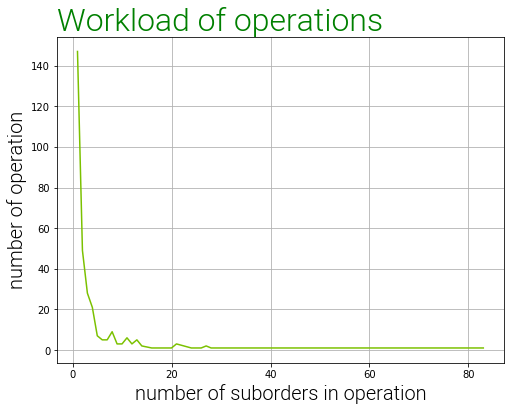

In [ ]:
order_number = nzp_df['OPERATION_ID'].value_counts()
dial_stat = Counter(list(order_number))
plt.figure(figsize=(8,6))
plt.plot(*zip(*sorted(dial_stat.items())), color='#7BC100')
plt.grid(True)
plt.ylabel('number of operation',fontproperties=fontprop_axis)
plt.xlabel('number of suborders in operation',fontproperties=fontprop_axis)
plt.title('Workload of operations', loc='left',fontproperties=fontprop_title, color="green")
plt.show()

### Check the hypothesis that the "CODE"+"OPERATION_ID" is a 1-to-1 ratio

- для каждой детали есть несколько маршрутов
- для каждого маршрута описана последовательность операций 
- для каждой детали из nzp есть operation id на которой остановилось производство

Вопрос: можно ли однозначно определить, на каком маршруте и на каком шаге маршрута сейчас находится батч в NZP?

In [ ]:
route_op_group = technology_df.groupby(['OPERATION_ID','ROUTE_ID'],as_index = False).count().pivot('OPERATION_ID','ROUTE_ID').fillna(0)['NAME']

operation_id_list = []
route_id_sum_list = []
route_id_list = []
for col in route_op_group.columns:
  if max(list(route_op_group[col]))>1:
    #print('ERROR', col)
    error_series = route_op_group[route_op_group[col]>1][col]
    operation_id_list.extend(list(error_series.index))
    route_id_sum_list.extend(list(error_series))
    route_id_list.extend([col for i in list(error_series.index)])

error_df = pd.DataFrame({'OPERATION_ID': operation_id_list, 'ROUTE_ID': route_id_list, 'SUM': route_id_sum_list})
merge_errors_tech_df = pd.merge(error_df, technology_df, how='left', on=['OPERATION_ID', 'ROUTE_ID'])
merge_errors_tech_df['CODE'] = merge_errors_tech_df['NAME']


In [ ]:
merge_errors_tech_df_2 = pd.merge(merge_errors_tech_df, nzp_df, how='left', on=['OPERATION_ID', 'CODE']).fillna('not in NZP')
print('the count of the problematic couples "OPERATION_ID"+"CODE" in the NZP is:', merge_errors_tech_df_2[merge_errors_tech_df_2['ORDER']!='not in NZP'].shape[0])

the count of the problematic couples "OPERATION_ID"+"CODE" in the NZP is: 0


**Result**: Couple "OPERATION_ID"+"CODE" (where "CODE" is a detail id) is NOT a 1-to-1 ratio (look at the table above). There are 2 operations with a similar "OPERATION_ID" in several routes. 

---

So, in these cases, we have a **problem**: we can't answer the question: what is the NOP of the current operation of the order batch in the NZP. 

---

But in current NZP we haven't got such problematic couple (see at the previous cell printing) "OPERATION_ID"+"CODE". So, in this case we could merge nzp_df with tech_small_df on "OPERATION_ID" 1-to-1 to find out on which route and route step each batch is now in NZP. 

But this problem could be actual if in the future in the NZP will be problematic "OPERATION_ID"+"CODE". 

---

The examples of the problematic couples "OPERATION_ID"-"CODE" you can see at the "merge_errors_tech_df".

**For example**, if we have a couple "Пружина НПЦ v7.4_r / 7,80_RAL 9005" + "1869_06", we can't match 1-to-1 this couple with the concrete step ("NOP" column) in the route "ПРО-2019.03/0204-3206-001", because it could be 6th or 9th step (look at the "NOP" column) of the route "ПРО-2019.03/0204-3206-001".

---

**Decision**: in the future the NZP table must include the column "NOP" for disambiguation

### Merging nzp_df with technology_df on "OPERATION_ID"+"CODE" couples 1-to-1 

to find out on which route and route step each batch is now in NZP

In [ ]:
nzp_df_full = pd.merge(nzp_df, technology_df, how='left', on=['OPERATION_ID', 'CODE']).fillna('not in technology_df')

**Problem**: there are 20 batches in the NZP with "OPERATION_ID"+"CODE" couples, that didn't find in the technology_df

In [ ]:
errors_df = nzp_df_full[nzp_df_full['ROUTE_ID']=='not in technology_df']
print("amount of batches in the NZP with 'OPERATION_ID'+'CODE' couples, that didn't find in the technology_df:", errors_df.shape[0])

amount of batches in the NZP with 'OPERATION_ID'+'CODE' couples, that didn't find in the technology_df: 20


In [ ]:
nzp_df_full = pd.merge(nzp_df_full, entity_routes_df, how='left', on=['ROUTE_ID', 'CODE']).fillna('not in entity_routes_df')

### Which batches have not yet been launched on any route

In [ ]:
nzp_plan_merge_df = pd.merge(plan_df, nzp_df_full, how='left', on=['ORDER', 'CODE', 'AMOUNT']).fillna('not in nzp')
nzp_plan_merge_df[nzp_plan_merge_df['BATCH_ID']=='not in nzp']

INITIAL_AMOUNT  AMOUNT  ...       T_SHT ALTERNATIVE
0             6660       0  ...  not in nzp  not in nzp
1             6500       0  ...  not in nzp  not in nzp
2            14920    1275  ...  not in nzp  not in nzp
3            60404   14928  ...  not in nzp  not in nzp
4             3250      70  ...  not in nzp  not in nzp
5             9682       0  ...  not in nzp  not in nzp
6             3722       0  ...  not in nzp  not in nzp
7            16007     554  ...  not in nzp  not in nzp
8            16007       0  ...  not in nzp  not in nzp
9            15359       0  ...  not in nzp  not in nzp
10              41       0  ...  not in nzp  not in nzp
11              41       0  ...  not in nzp  not in nzp
12             300     286  ...  not in nzp  not in nzp
13             463       0  ...  not in nzp  not in nzp
14             736     126  ...  not in nzp  not in nzp
15             121      13  ...  not in nzp  not in nzp
16               9       1  ...  not in nzp  not in nzp
17              23       9  ...  not in nzp  not in nzp
18             524       0  ...  not in nzp  not in nzp
19             524       0  ...  not in nzp  not in nzp
20             213     212  ...  not in nzp  not in nzp
21             213     194  ...  not in nzp  not in nzp
22             213     213  ...  not in nzp  not in nzp
23             213     200  ...  not in nzp  not in nzp
24             139     115  ...  not in nzp  not in nzp
25             139      69  ...  not in nzp  not in nzp
26             700     109  ...  not in nzp  not in nzp
27            3696       0  ...  not in nzp  not in nzp
28            1056       0  ...  not in nzp  not in nzp
29            2640       0  ...  not in nzp  not in nzp

[30 rows x 19 columns]

In [ ]:
print("amount of the detail batches, that doesn't descript in the nzp_df: ", plan_df.shape[0] - nzp_df.shape[0])
print("amount of the detail batches in the srart of the route: ", nzp_df_full[nzp_df_full['NOP']==1].shape[0])

amount of the detail batches, that doesn't descript in the nzp_df:  10
amount of the detail batches in the srart of the route:  2


**Вывод**: на данном этапе всего для 12 батчей ДСЕ не определено маршрута и можно сделать выбор. 

**Вопрос**: это действительно та степень свободы, которая есть для решения задачи? Ведь если подразумевать допущение "одна ДСЕ идет полностью по одному маршруту", значит для всех остальных 1493 батчей маршруты строго определены. 

## NZP, full table

In [ ]:
colors = n_colors('rgb(216, 245, 169)', 'rgb(255, 255, 255)', 2, colortype='rgb')
colors = np.array([colors[0] if i%2==0 else colors[1] for i in range(nzp_df_full.shape[0])])


fig = make_subplots(
    rows=1, cols=1,
    shared_xaxes=True,
    vertical_spacing=0,
    specs=[[{"type": "table"}]]
)

fig.add_trace(
    go.Table(
        columnwidth = [120, 150, 300, 150, 250, 300, 300, 200, 150, 200, 200, 150, 150, 200],
        header=dict(
            values=list(nzp_df_full.columns),
            line_color='rgb(123, 193, 0)', fill_color='rgb(123, 193, 0)',
            font=dict(color='white', size=17),
            align="left"
        ),
        cells=dict(
            values=[nzp_df_full[k].tolist() for k in nzp_df_full.columns],
            line_color=[colors],
            fill_color=[colors],
            font=dict(color='black', size=15)

        ),
        
    ),
    row=1, col=1,

)

fig.update_layout(
    width=2300,
    height=700,
    showlegend=False,
    title_text="NZP full (with information about ROUTE_ID and current step of the ROUTE ('NOP')",
)

fig.show()

In [ ]:
big_df = pd.merge(nzp_df_full, technology_df, how='left', on=['ROUTE_ID']).fillna('-')


In [ ]:
new_indexes = []
nop_NZP_list = list(big_df['NOP_x'])
nop_all_list = list(big_df['NOP_y'])
for i in range(len(nop_NZP_list)):
  if nop_NZP_list[i]<=nop_all_list[i]:
    new_indexes.append(i)

big_df = big_df.iloc[new_indexes]

In [ ]:
batch_time_list = [amount*time_sht for amount, time_sht in zip(list(big_df['AMOUNT']), list(big_df['T_SHT_y']))]
big_df['BATCH_TIME'] = batch_time_list

### Summary table of time spent on work on batches on equipment of certain classes

In [ ]:
big_df_group_1 = big_df.groupby(['BATCH_ID', 'EQUIPMENT_ID_y'],as_index = False).agg({"BATCH_TIME": "sum"}).pivot('BATCH_ID', 'EQUIPMENT_ID_y').fillna(0)
big_df_group_1.head(10)

BATCH_TIME  ...                                           
EQUIPMENT_ID_y Зачистка вылета  ... Эл. печь камерная с выкатным поддоном №1,2
BATCH_ID                        ...                                           
10179942                   0.0  ...                                        0.0
10179943                   0.0  ...                                        0.0
10179944                   0.0  ...                                        0.0
10180059                   0.0  ...                                        0.0
10181622                   0.0  ...                                        0.0
10184463                   0.0  ...                                       10.0
10184532                   0.0  ...                                       10.0
10185791                   0.0  ...                                        0.0
10185813                   0.0  ...                                        0.0
10186536                   0.0  ...                                        0.0

[10 rows x 35 columns]

### Summary table of time spent on work on detail of certain type on equipment of certain classes

In [ ]:
big_df_group_2 = big_df.groupby(['CODE_y', 'EQUIPMENT_ID_y'],as_index = False).agg({"BATCH_TIME": "sum"}).pivot('CODE_y', 'EQUIPMENT_ID_y').fillna(0)
big_df_group_2.head(10)

BATCH_TIME  ...                                           
EQUIPMENT_ID_y                               Зачистка вылета  ... Эл. печь камерная с выкатным поддоном №1,2
CODE_y                                                        ...                                           
Пружина 1.7170.31.36.102.30 / 18.00_RAL 7015             0.0  ...                                        0.0
Пружина 100-3519168 / 2,65_б/о                           0.0  ...                                        0.0
Пружина 100-3519268 / 2,16_RAL 9005                      0.0  ...                                        0.0
Пружина 194.30.021-0 / 13,90_RAL 9005                    0.4  ...                                        0.0
Пружина 194.30.022-0 / 6,60_RAL 9005                     0.0  ...                                        0.0
Пружина 194.30.023-0 / 4,90_RAL 9005                     5.0  ...                                        0.0
Пружина 2170-2902712 / 2,10_RAL 9005                     0.0  ...                                        0.0
Пружина 3ТЭ25КМ.035.30.110 / 33,90_RAL 7012              0.0  ...                                        0.0
Пружина 4110.20.031 / 40,40_RAL 7000                     0.0  ...                                        0.0
Пружина 4110.20.031 / 40,40_б/о                          0.0  ...                                        0.0

[10 rows x 35 columns]

### Production time for details of different types (min)

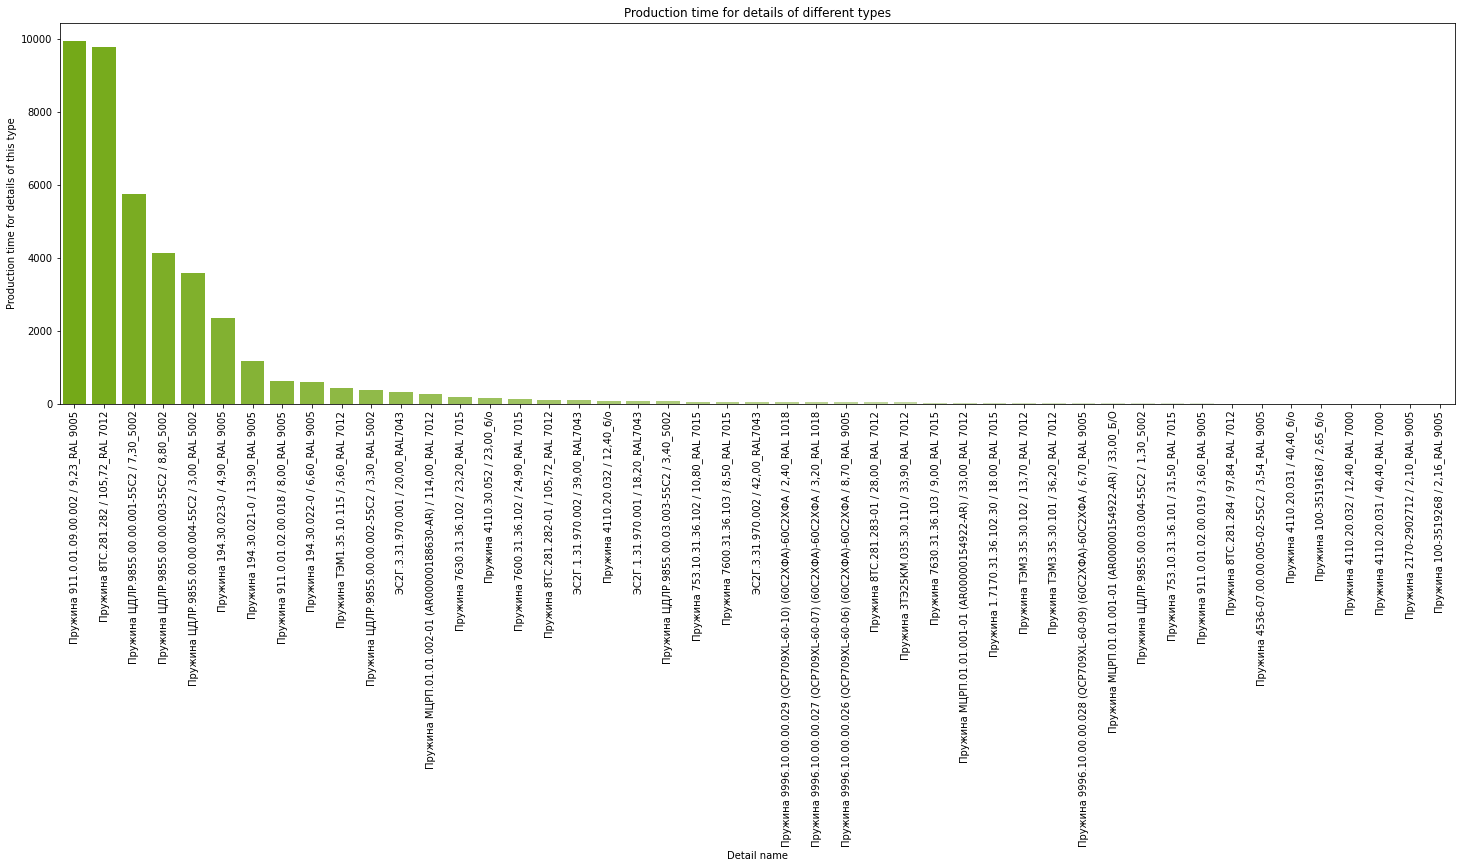

In [ ]:
details_time_number = big_df.groupby(['CODE_y'])['BATCH_TIME'].agg('sum')
details_time_number_df = pd.DataFrame({'CODE_y': list(dict(details_time_number).keys()), 'BATCH_TIME': (dict(details_time_number).values())})
details_time_number_df = details_time_number_df.sort_values(by='BATCH_TIME', ascending=False)

f, ax = plt.subplots(figsize=(25, 7))
bp = sns.barplot(x = 'CODE_y', y='BATCH_TIME', data=details_time_number_df,
            palette=sns.light_palette("#7bc100", reverse=True, n_colors=len(set(list(details_time_number_df['BATCH_TIME'])))))
plt.xlabel('Detail name')
plt.ylabel('Production time for details of this type (min)')
plt.title('Production time for details of different types (min)')
bp = bp.set_xticklabels(labels = list(details_time_number_df['CODE_y']), rotation=90) 

### Time of use of equipment of different classes (min)

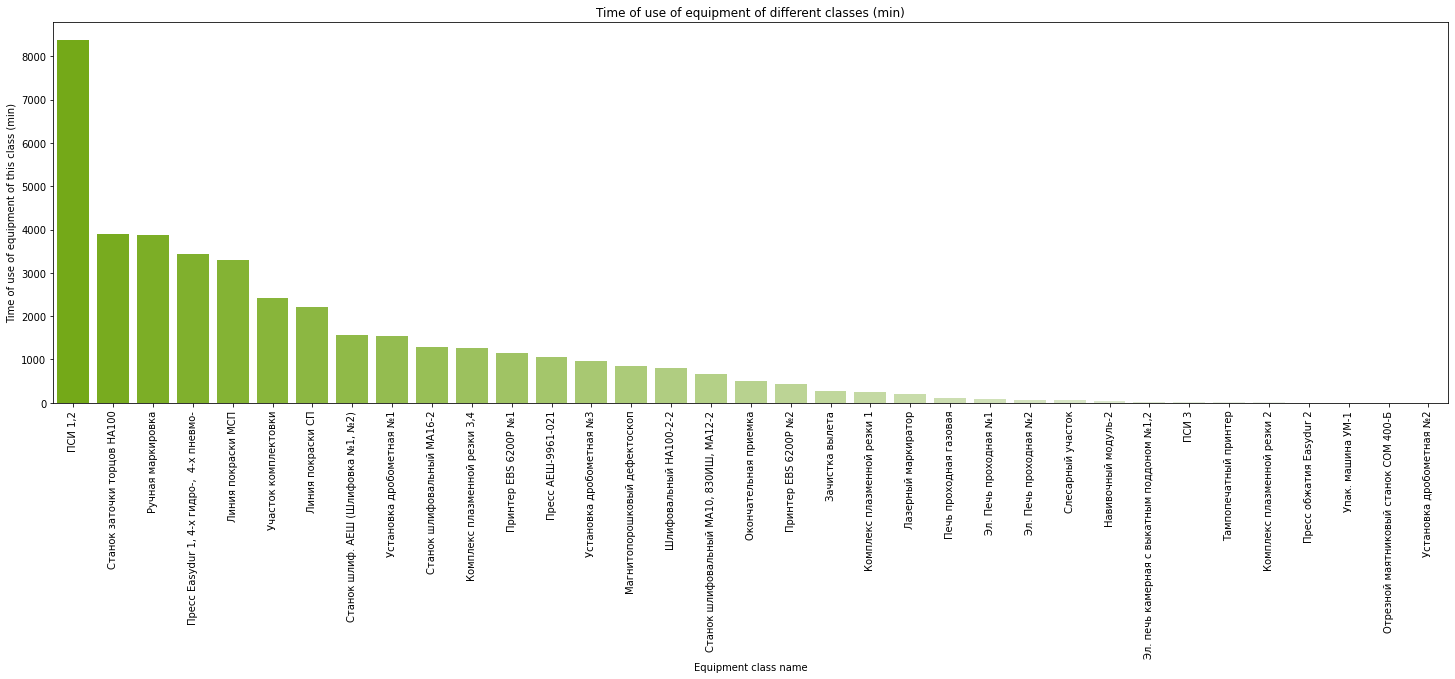

In [ ]:
equipment_time_number = big_df.groupby(['EQUIPMENT_ID_y'])['BATCH_TIME'].agg('sum')
equipment_time_number_df = pd.DataFrame({'EQUIPMENT_ID_y': list(dict(equipment_time_number).keys()), 'BATCH_TIME': (dict(equipment_time_number).values())})
equipment_time_number_df = equipment_time_number_df.sort_values(by='BATCH_TIME', ascending=False)

f, ax = plt.subplots(figsize=(25, 7))
bp = sns.barplot(x = 'EQUIPMENT_ID_y', y='BATCH_TIME', data=equipment_time_number_df,
            palette=sns.light_palette("#7bc100", reverse=True, n_colors=len(set(list(equipment_time_number_df['BATCH_TIME'])))))
plt.xlabel('Equipment class name')
plt.ylabel('Time of use of equipment of this class (min)')
plt.title('Time of use of equipment of different classes (min)')
bp = bp.set_xticklabels(labels = list(equipment_time_number_df['EQUIPMENT_ID_y']), rotation=90)

### Time of use of equipment of different classes (min) for one detail (example)
In the axis x there are texts that means equipment class name and NOP, divided by "___"

In [ ]:
big_df_example

ORDER  BATCH_ID  ...  BATCH_TIME                   EQUIPMENT_ID_NOP
5602   20-000022  10227915  ...   65.599992  Магнитопорошковый дефектоскоп___4
5603   20-000022  10227915  ...   28.800000       Установка дробометная №1___5
5604   20-000022  10227915  ...   46.399992             Пресс АЕШ-9961-021___6
5605   20-000022  10227915  ...  144.000000                        ПСИ 1,2___7
5606   20-000022  10227915  ...   19.999992             Линия покраски МСП___8
...          ...       ...  ...         ...                                ...
13135  19-000086  10202462  ...   30.000000              Ручная маркировка___9
13144  19-000086  10219392  ...    5.000000              Ручная маркировка___9
14635  17-000010  10219004  ...    1.666666             Линия покраски МСП___5
14636  17-000010  10219004  ...   10.000000              Ручная маркировка___6
14637  17-000010  10219004  ...    0.033332          Окончательная приемка___7

[218 rows x 26 columns]

In [ ]:
big_df[(big_df['CODE_y']=='Пружина 911.0.01.09.00.002 / 9,23_RAL 9005') & (big_df['BATCH_ID']==10227915)]

ORDER  ...  BATCH_TIME
5602  20-000022  ...   65.599992
5603  20-000022  ...   28.800000
5604  20-000022  ...   46.399992
5605  20-000022  ...  144.000000
5606  20-000022  ...   19.999992
5607  20-000022  ...  120.000000

[6 rows x 25 columns]

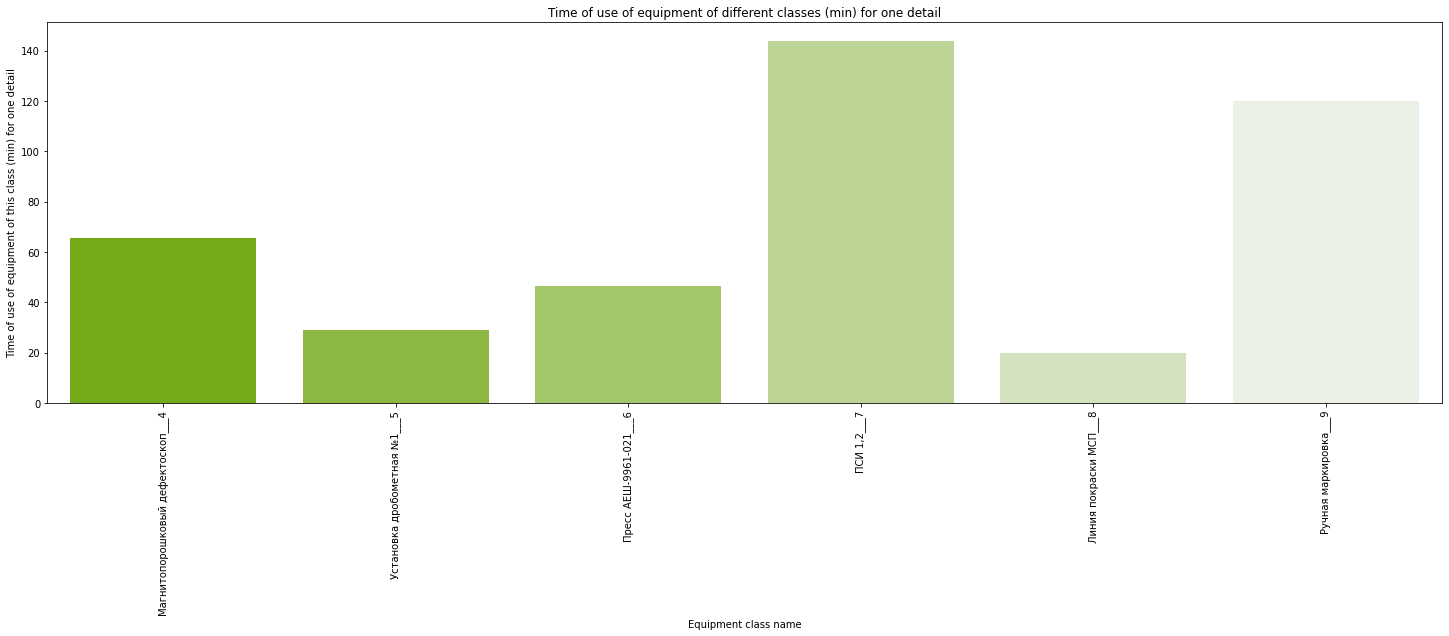

In [ ]:
big_df_example = big_df[(big_df['CODE_y']=='Пружина 911.0.01.09.00.002 / 9,23_RAL 9005') & (big_df['BATCH_ID']==10227915)]
big_df_example['EQUIPMENT_ID_NOP'] = [str(eq_id)+'___'+str(int(nop)) for eq_id, nop in zip(list(big_df_example['EQUIPMENT_ID_y']), list(big_df_example['NOP_y']))]
equipment_time_ex_number = big_df_example.groupby(['EQUIPMENT_ID_NOP'])['BATCH_TIME'].agg('sum')
equipment_time_ex_number_df = pd.DataFrame({'EQUIPMENT_ID_NOP': list(dict(equipment_time_ex_number).keys()), 'BATCH_TIME': (dict(equipment_time_ex_number).values())})
equipment_time_ex_number_df['NOP'] = [eq_nop.split('___')[-1] for eq_nop in list(equipment_time_ex_number_df['EQUIPMENT_ID_NOP'])]
equipment_time_ex_number_df = equipment_time_ex_number_df.sort_values(by='NOP', ascending=True)

f, ax = plt.subplots(figsize=(25, 7))
bp = sns.barplot(x = 'EQUIPMENT_ID_NOP', y='BATCH_TIME', data=equipment_time_ex_number_df,
            palette=sns.light_palette("#7bc100", reverse=True, n_colors=len(set(list(equipment_time_ex_number_df['BATCH_TIME'])))))
plt.xlabel('Equipment class name')
plt.ylabel('Time of use of equipment of this class (min) for one detail')
plt.title('Time of use of equipment of different classes (min) for one detail')
bp = bp.set_xticklabels(labels = list(equipment_time_ex_number_df['EQUIPMENT_ID_NOP']), rotation=90)